In [42]:
# Import the modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Read the CSV file into a DataFrame

df = pd.read_csv('data.csv')

In [44]:
# Display the column names of the DataFrame

print("Column Names:")
print(df.columns)

Column Names:
Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')


In [45]:
# Display first 5 rows

df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9.0
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6.0
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6.0
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10.0
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6.0


In [46]:
# Display information about the DataFrame

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3894 entries, 0 to 3893
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3894 non-null   object 
 1   Length          3894 non-null   float64
 2   Diameter        3894 non-null   float64
 3   Height          3894 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3894 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3894 non-null   float64
dtypes: float64(8), object(1)
memory usage: 273.9+ KB
None


In [47]:
# Display summary statistics of the DataFrame

print(df.describe())

            Length     Diameter       Height       Weight  Shucked Weight  \
count  3894.000000  3894.000000  3894.000000  3893.000000     3894.000000   
mean      1.311415     1.020984     0.349403    23.567275       10.210581   
std       0.300470     0.248266     0.104978    13.891201        6.277724   
min       0.187500     0.137500     0.000000     0.056699        0.028349   
25%       1.125000     0.875000     0.287500    12.672227        5.343881   
50%       1.362500     1.062500     0.362500    22.792998        9.546694   
75%       1.537500     1.200000     0.412500    32.786197       14.273973   
max       2.037500     1.625000     2.825000    80.101512       42.184056   

       Viscera Weight  Shell Weight          Age  
count     3893.000000   3893.000000  3894.000000  
mean         5.136546      6.795844     9.954802  
std          3.104133      3.943392     3.220553  
min          0.014175      0.042524     1.000000  
25%          2.664853      3.713785     8.000000  


# Data Visualization:

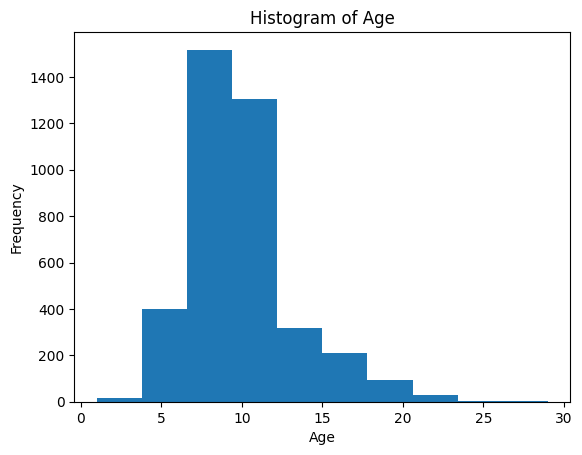

In [48]:
# Histogram of the 'Age' column
plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

 The histogram of the 'Age' column is slightly skewed to the right, it indicates that the distribution of ages is concentrated towards the younger ages with a tail extending towards the older ages. This means that there are relatively fewer individuals in the older age groups compared to the younger age groups.

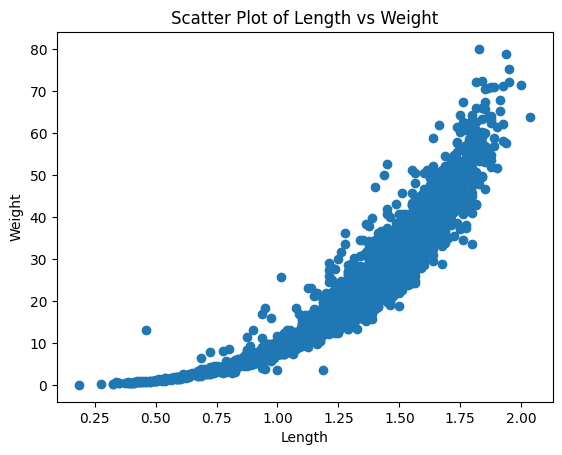

In [49]:
# Scatter plot of 'Length' vs 'Weight'
plt.scatter(df['Length'], df['Weight'])
plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('Scatter Plot of Length vs Weight')
plt.show()

Based on the scatter plot of Length vs Weight, it can be concluded that there is a positive correlation between the Length and Weight of the observed data points. The plot shows that as the Length increases, the Weight also tends to increase.

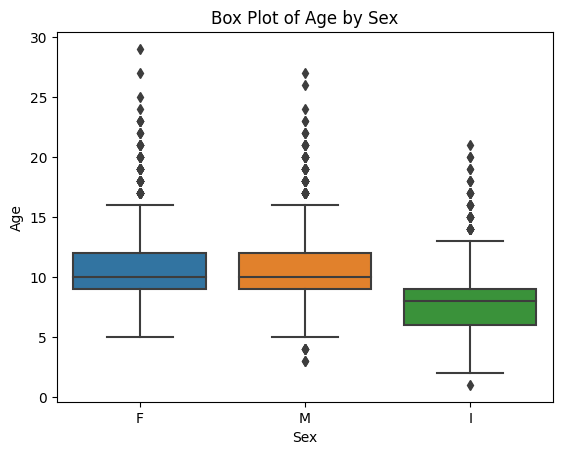

In [50]:
# Box plot to visualize the distribution of Age across different Sex categories.

sns.boxplot(x='Sex', y='Age', data=df)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Box Plot of Age by Sex')
plt.show()

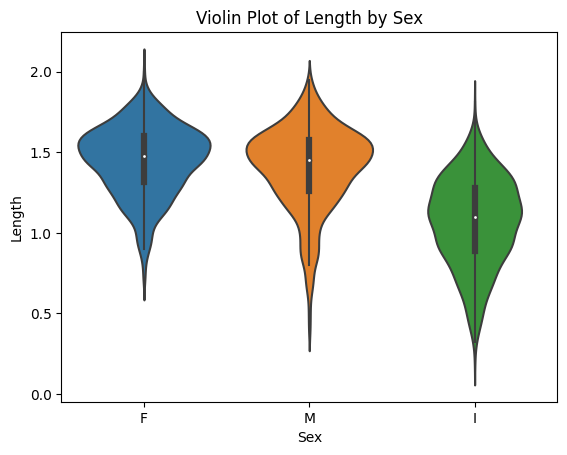

In [51]:
# violin plot to show the distribution of Length across different Sex categories

sns.violinplot(x='Sex', y='Length', data=df)
plt.xlabel('Sex')
plt.ylabel('Length')
plt.title('Violin Plot of Length by Sex')
plt.show()

<ipython-input-52-05bcba2ecb05>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


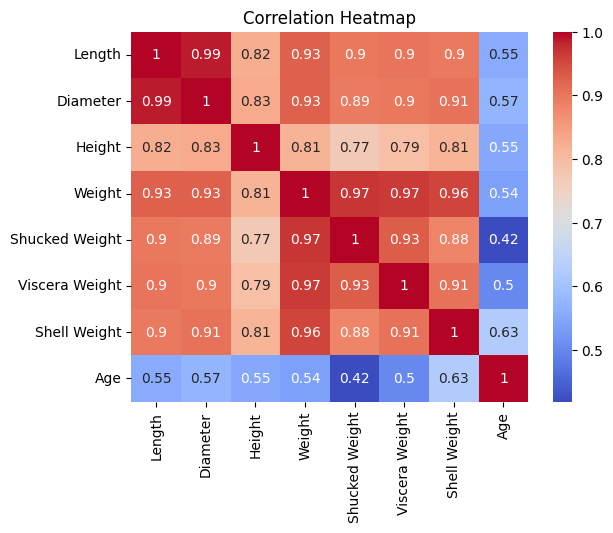

In [52]:
# heatmap to visualize the correlation between numerical variables in the DataFrame

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


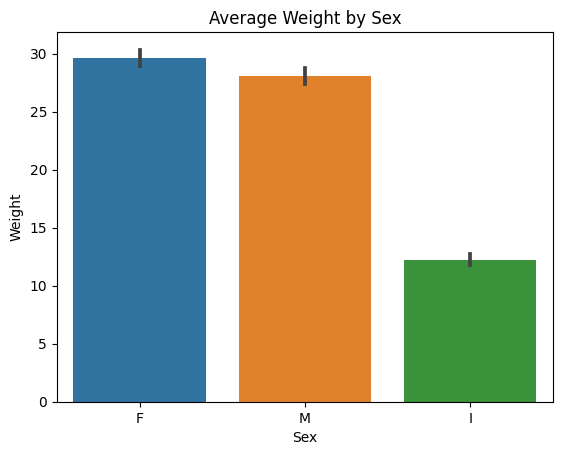

In [53]:
# bar plot to display the average Weight for each Sex category

sns.barplot(x='Sex', y='Weight', data=df)
plt.xlabel('Sex')
plt.ylabel('Weight')
plt.title('Average Weight by Sex')
plt.show()

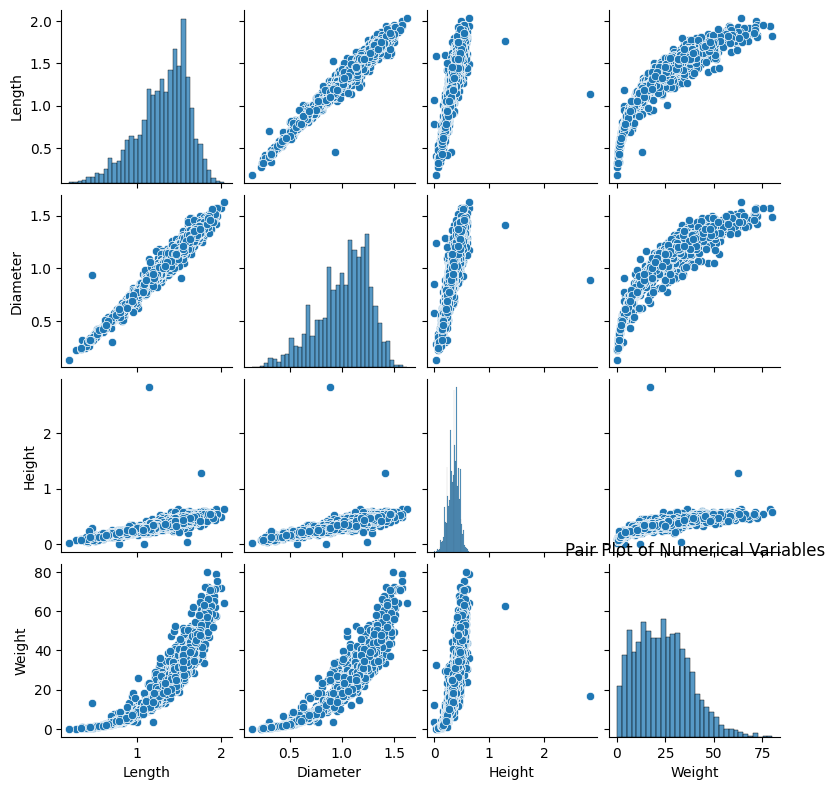

In [54]:
# pair plot to show pairwise relationships between the numerical variables Length, Diameter, Height, and Weight

sns.pairplot(df[['Length', 'Diameter', 'Height', 'Weight']], height = 2)
plt.title('Pair Plot of Numerical Variables')
plt.show()

It can be seen that there are several outliers in the 'Height' column.

# Data Cleaning

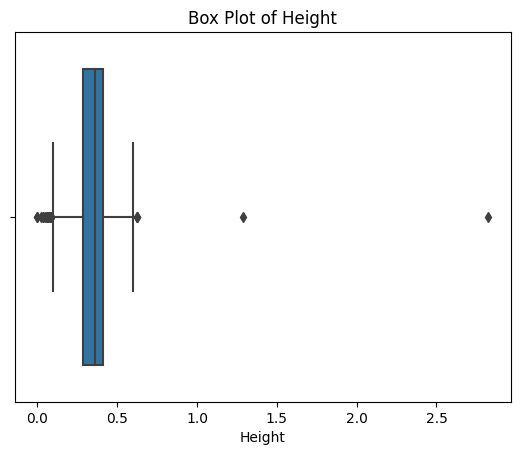

In [55]:
# box plot of the 'Height' column, which helps in identifying outliers

sns.boxplot(x=df['Height'])
plt.xlabel('Height')
plt.title('Box Plot of Height')
plt.show()

In [56]:
# Filter out the outliers in 'Height' greater than 1
df = df[df['Height'] <= 1]

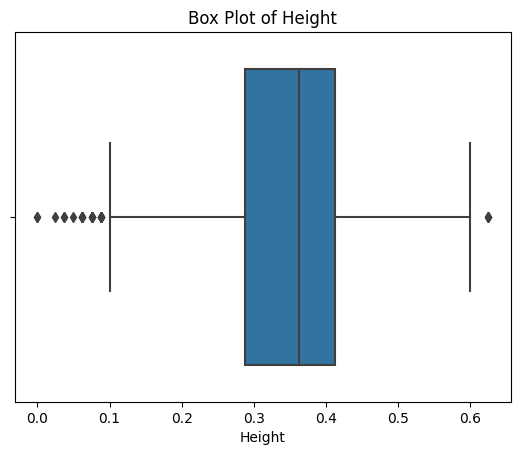

In [57]:
sns.boxplot(x=df['Height'])
plt.xlabel('Height')
plt.title('Box Plot of Height')
plt.show()

In [58]:
#as there is only one missing record, we can just drop it
df.dropna(inplace = True)

# Data Aggregation

In [59]:
# Group by Sex and calculate average Age

average_age_by_sex = df.groupby('Sex')['Age'].mean()
print(average_age_by_sex)

Sex
F    11.142157
I     7.883212
M    10.723849
Name: Age, dtype: float64


In [60]:
# Group by Sex and calculate total Weight

total_weight_by_sex = df.groupby('Sex')['Weight'].sum()
print(total_weight_by_sex)

Sex
F    36321.379400
I    15092.919431
M    40253.610972
Name: Weight, dtype: float64


In [61]:
# Group by Sex and calculate the number of occurrences

count_by_sex = df['Sex'].value_counts()
print(count_by_sex)

M    1434
I    1233
F    1224
Name: Sex, dtype: int64


In [62]:
# Group by Age and calculate the maximum Length

max_length_by_age = df.groupby('Age')['Length'].max()
print(max_length_by_age)


Age
1.0     0.1875
2.0     0.3750
3.0     0.6000
4.0     0.9000
5.0     1.1000
6.0     1.6500
7.0     1.8000
8.0     1.8000
9.0     1.8625
10.0    1.9250
11.0    1.9500
12.0    1.9375
13.0    1.9000
14.0    2.0375
15.0    1.7750
16.0    1.8500
17.0    1.9375
18.0    1.8625
19.0    1.7625
20.0    1.7500
21.0    1.8375
22.0    1.6375
23.0    2.0000
24.0    1.7500
25.0    1.6125
26.0    1.5000
27.0    1.6625
29.0    1.7500
Name: Length, dtype: float64


# Feature Engineering

In [63]:
# Creating a new feature based on Length and Diameter

df['Length_Diameter_Ratio'] = df['Length'] / df['Diameter']

In [64]:
# Creating a new feature based on Weight and Shell Weight

df['Weight_Shell_Ratio'] = df['Weight'] / df['Shell Weight']

In [65]:
# df['Weight_Log'] = np.log1p(df['Weight'])

df['Weight_Log'] = np.log1p(df['Weight'])

In [66]:
# Encoding categorical variables using label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex_Encoded'] = le.fit_transform(df['Sex'])


In [67]:
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Length_Diameter_Ratio,Weight_Shell_Ratio,Weight_Log,Sex_Encoded
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9.0,1.223404,3.651261,3.243987,0
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6.0,1.365385,3.463636,1.856389,2
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6.0,1.338710,2.876923,2.191881,1
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10.0,1.323944,2.570270,2.672781,0
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6.0,1.339623,4.058333,2.067255,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,F,1.4625,1.1375,0.3250,24.819987,11.651645,5.854172,6.378637,8.0,1.285714,3.891111,3.251149,0
3890,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10.0,1.278351,3.523188,3.568372,0
3891,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5.0,1.351351,3.155556,1.102875,1
3892,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6.0,1.370968,3.476190,2.429003,1


Modelling

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features (X) and target variable (y)
X = df[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']]
y = df['Age']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

# Initialize and train the machine learning model (e.g., Linear Regression)
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 5.394758930487706


A mean squared error (MSE) value of 5.394758930487706 indicates the average squared difference between the predicted values and the actual values of the target variable (Age) in the test set.

Decision Tree

In [70]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the decision tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 8.629011553273427


A mean squared error (MSE) value of 8.629011553273427 indicates the average squared difference between the predicted values and the actual values of the target variable (Age) in the test set when using the decision tree regression model.

Random Forest Regressor - Default Hyperparameter Values

In [71]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 5.233945699614891


Random Forest using GridSearchCV

In [72]:
# Define the hyperparameter grid with a smaller set of values
rf_grid_param = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=123)

# Perform GridSearchCV with a smaller number of cv iterations
random_forest_model = GridSearchCV(estimator=rf_regressor,
                     param_grid=rf_grid_param,
                     scoring='neg_mean_squared_error',
                     cv=3,
                     n_jobs=-1,
                     verbose=1)

# Fit the GridSearchCV to the training data
random_forest_model.fit(X_train, y_train)

# Get the best Random Forest model
best_model = random_forest_model.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Print the best hyperparameters
print('Best Hyperparameters:', rf_GS.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Mean Squared Error: 5.214063702260847
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


The mean squared error (MSE) of the best model is 5.214063702260847. This value represents the average squared difference between the predicted and actual values in the test set.

support vector regression (SVR)

In [73]:
from sklearn.svm import SVR

# Initialize and train the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 5.659840966520299


A mean squared error (MSE) value of 5.659840966520299 indicates the average squared difference between the predicted values and the actual values of the target variable (Age) in the test set when using the support vector regression (SVR) model.



XG Boost using GridSearchCV

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor

# Define the hyperparameter grid
xgb_grid_param = {
    'n_estimators': [400, 500],
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.02],
    'subsample': [0.9, 1],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the XGBoost regressor
xgb_regressor = XGBRegressor(eval_metric='rmse', n_jobs=-1, random_state=123)

# Perform GridSearchCV
xgboost_model = GridSearchCV(estimator=xgb_regressor,
                      param_grid=xgb_grid_param,
                      scoring='neg_mean_squared_error',
                      cv=5,
                      n_jobs=-1,
                      verbose=1)

# Fit the GridSearchCV to the training data
xgboost_model.fit(X_train, y_train)

# Get the best XGBoost model
best_model = xgboost_model.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Print the best hyperparameters
print('Best Hyperparameters:', xgb_GS.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[12:11:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

Mean Squared Error: 5.202011733780679
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 500, 'subsample': 0.9}


The mean squared error (MSE) of the best model is 5.202011733780679. This value represents the average squared difference between the predicted and actual values in the test set.

Finding the best model

In [75]:
mse_values = {
    'Linear Regression': 5.394758930487706,
    'Decision Tree': 8.629011553273427,
    'Random Forest': 5.214063702260847,
    'Support Vector Regression': 5.659840966520299,
    'XGBoost': 5.202011733780679
}

best_model = min(mse_values, key=mse_values.get)

print('Best Model:', best_model)


Best Model: XGBoost


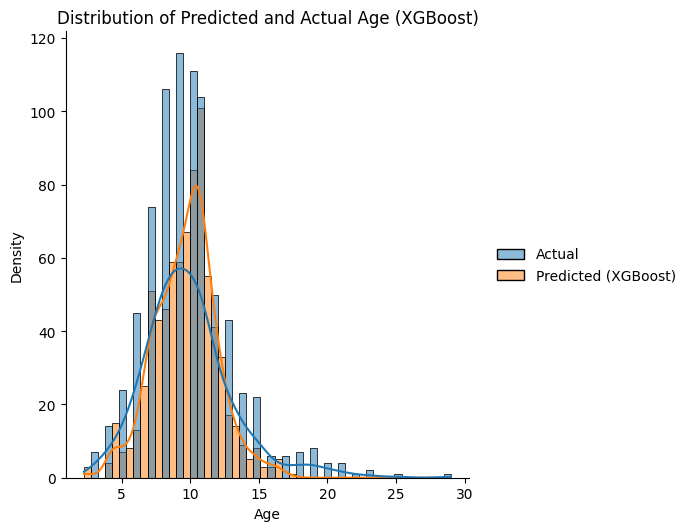

In [78]:
# Create a DataFrame with predicted and actual values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted (XGBoost)': y_pred})

# Plot the distribution of predicted and actual values using distplot
sns.displot(data=results_df, kde=True)

# Add labels and title to the plot
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Predicted and Actual Age (XGBoost)')

# Display the plot
plt.show()

Based on our analysis, we can conclude that the physical characteristics of crabs, such as length, diameter, weight, and height, play a significant role in determining their age. The XGBoost model, after hyperparameter tuning, proved to be the most accurate in predicting the age of crabs.